In [56]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
#从这里开始

In [ ]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ATM':'#0072b2',
             'LYN':'#d55e00',
             'ADRA2B':'#009e73',
             'HRH4':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_SEEN.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)


In [34]:
X_embedded_df['Gene'].value_counts()

Gene
ATM        52
LYN        52
ADRA2B     52
HRH4       52
SLC7A11    52
           ..
FOXM1      36
KCNQ2      36
PTPN2      36
GHSR       36
HTR3A      36
Name: count, Length: 130, dtype: int64

In [35]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ATM|LYN|ADRA2B|HRH4')]
X_embedded_df['Gene'].value_counts()

Gene
ATM       52
LYN       52
HRH4      52
ADRA2B    52
Name: count, dtype: int64

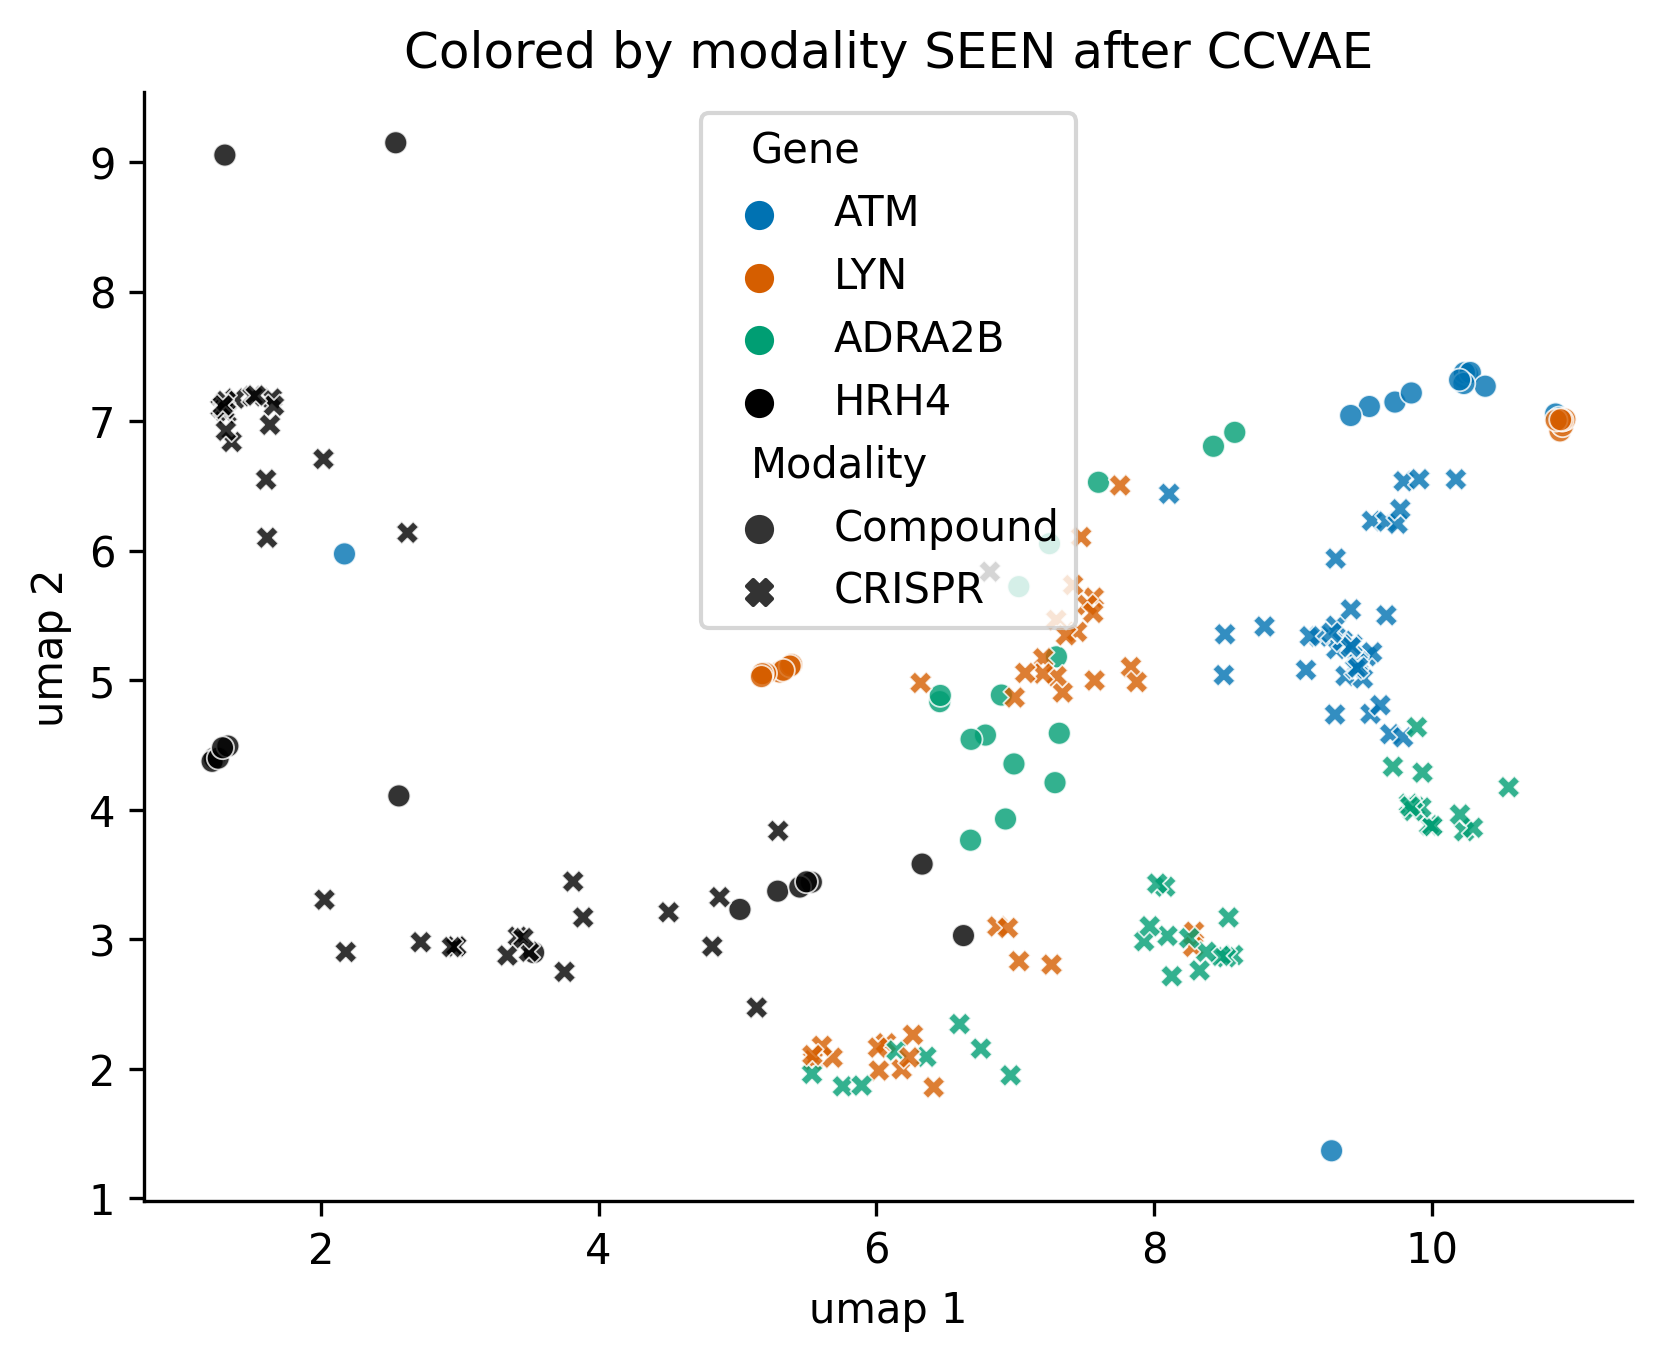

In [36]:
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ATM','LYN','ADRA2B','HRH4'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN after CCVAE")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

In [43]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'HTR3A':'#0072b2',
             'TNNC1':'#d55e00',
             'CYP1A2':'#009e73',
             'GHSR':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_UNSEEN.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)


/tmp/ipykernel_3338895/2533825741.py:41: DtypeWarning: Columns (2,6,7,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_UNSEEN.csv')


In [44]:
X_embedded_df['Gene'].value_counts()

Gene
HTR3A      84
TNNC1      84
CYP1A2     84
GHSR       84
SLCO2B1    84
           ..
ABL1       36
KCNN1      36
CCND1      36
P2RY12     36
SIRT2      35
Name: count, Length: 130, dtype: int64

In [45]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('HTR3A|TNNC1|CYP1A2|GHSR')]
X_embedded_df['Gene'].value_counts()

Gene
GHSR      84
TNNC1     84
CYP1A2    84
HTR3A     84
Name: count, dtype: int64

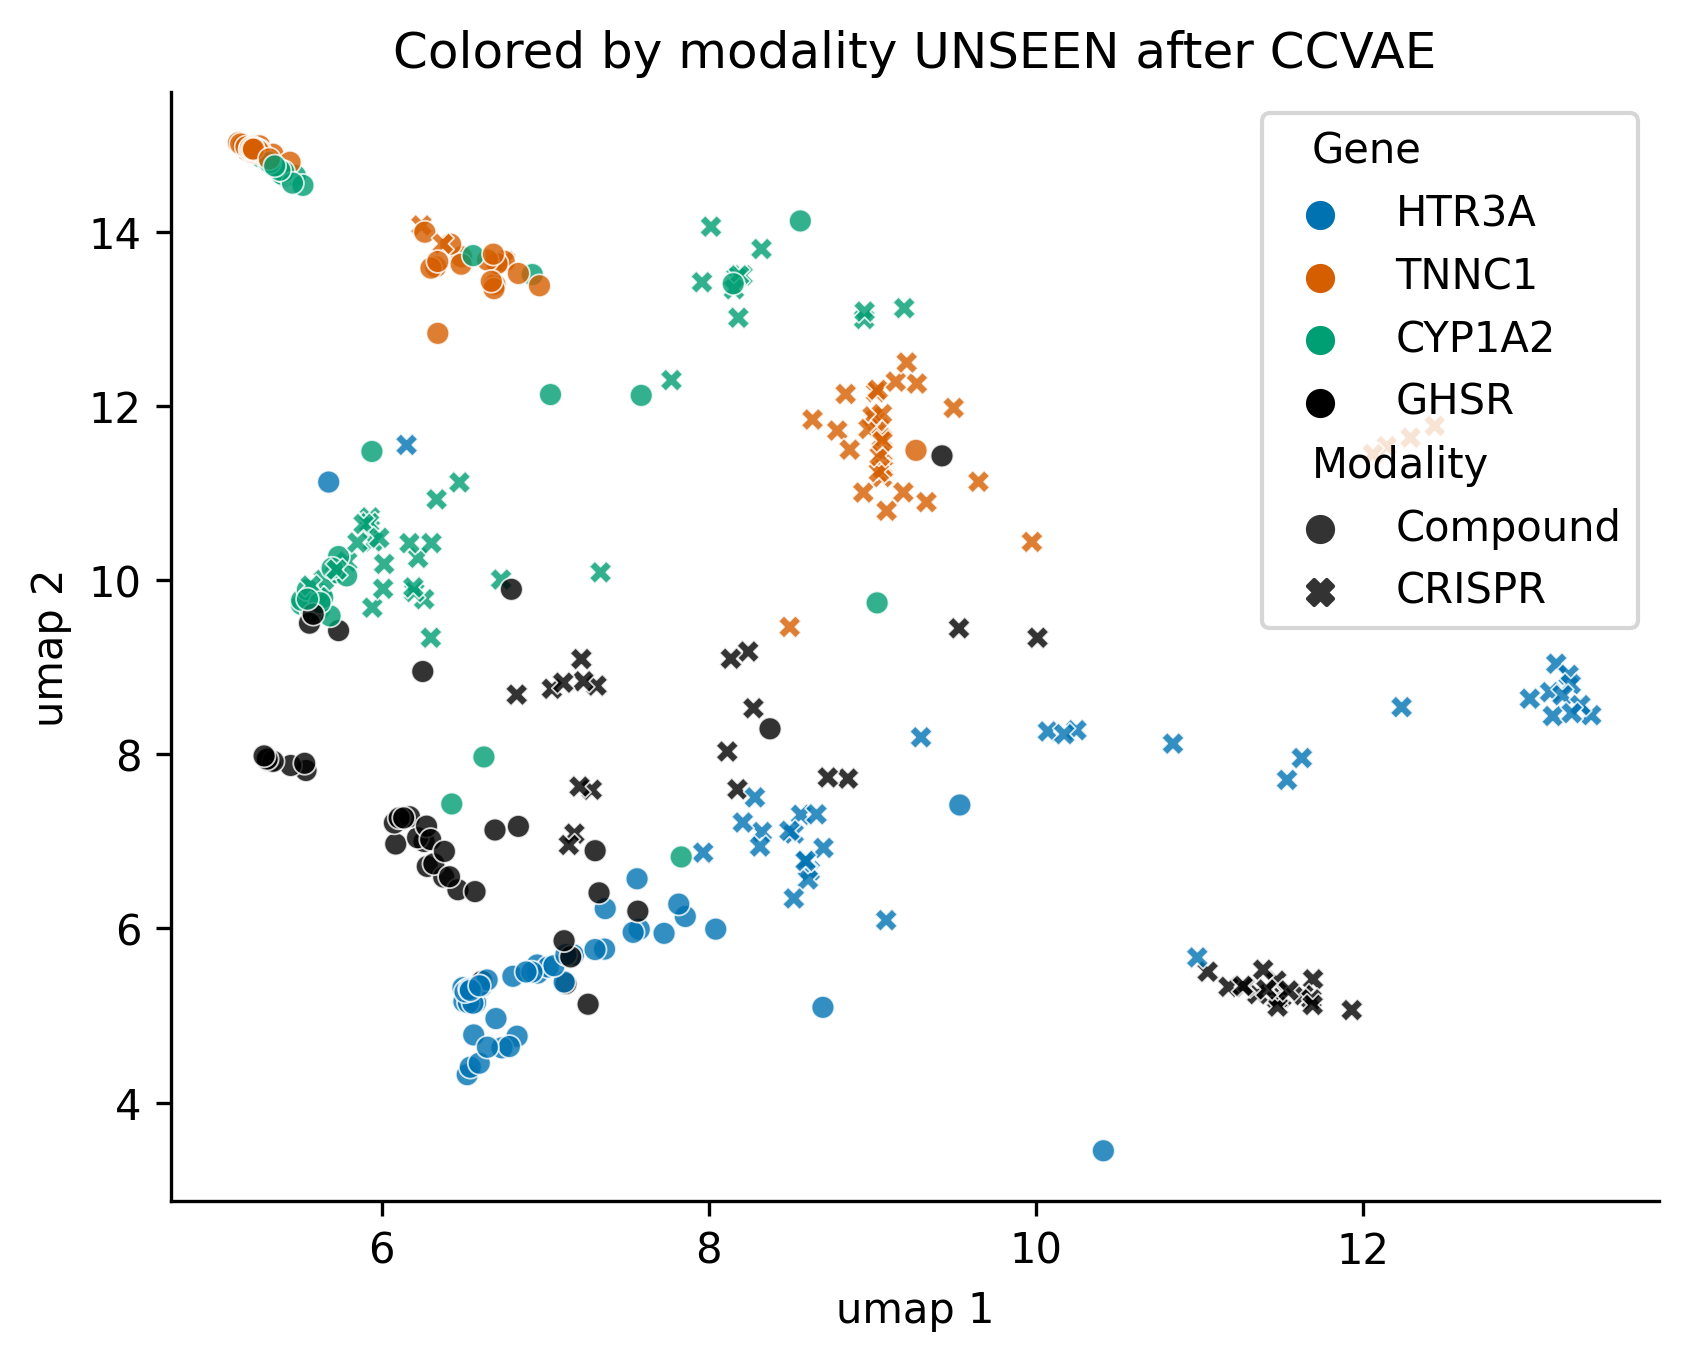

In [47]:
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['HTR3A','TNNC1','CYP1A2','GHSR'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality UNSEEN after CCVAE")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

In [66]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ADA':'#0072b2',
             'TNF':'#d55e00',
             'GPR119':'#009e73',
             'P2RY12':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_new.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df['Gene'].value_counts()

/tmp/ipykernel_3338895/653833466.py:41: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_new.csv')


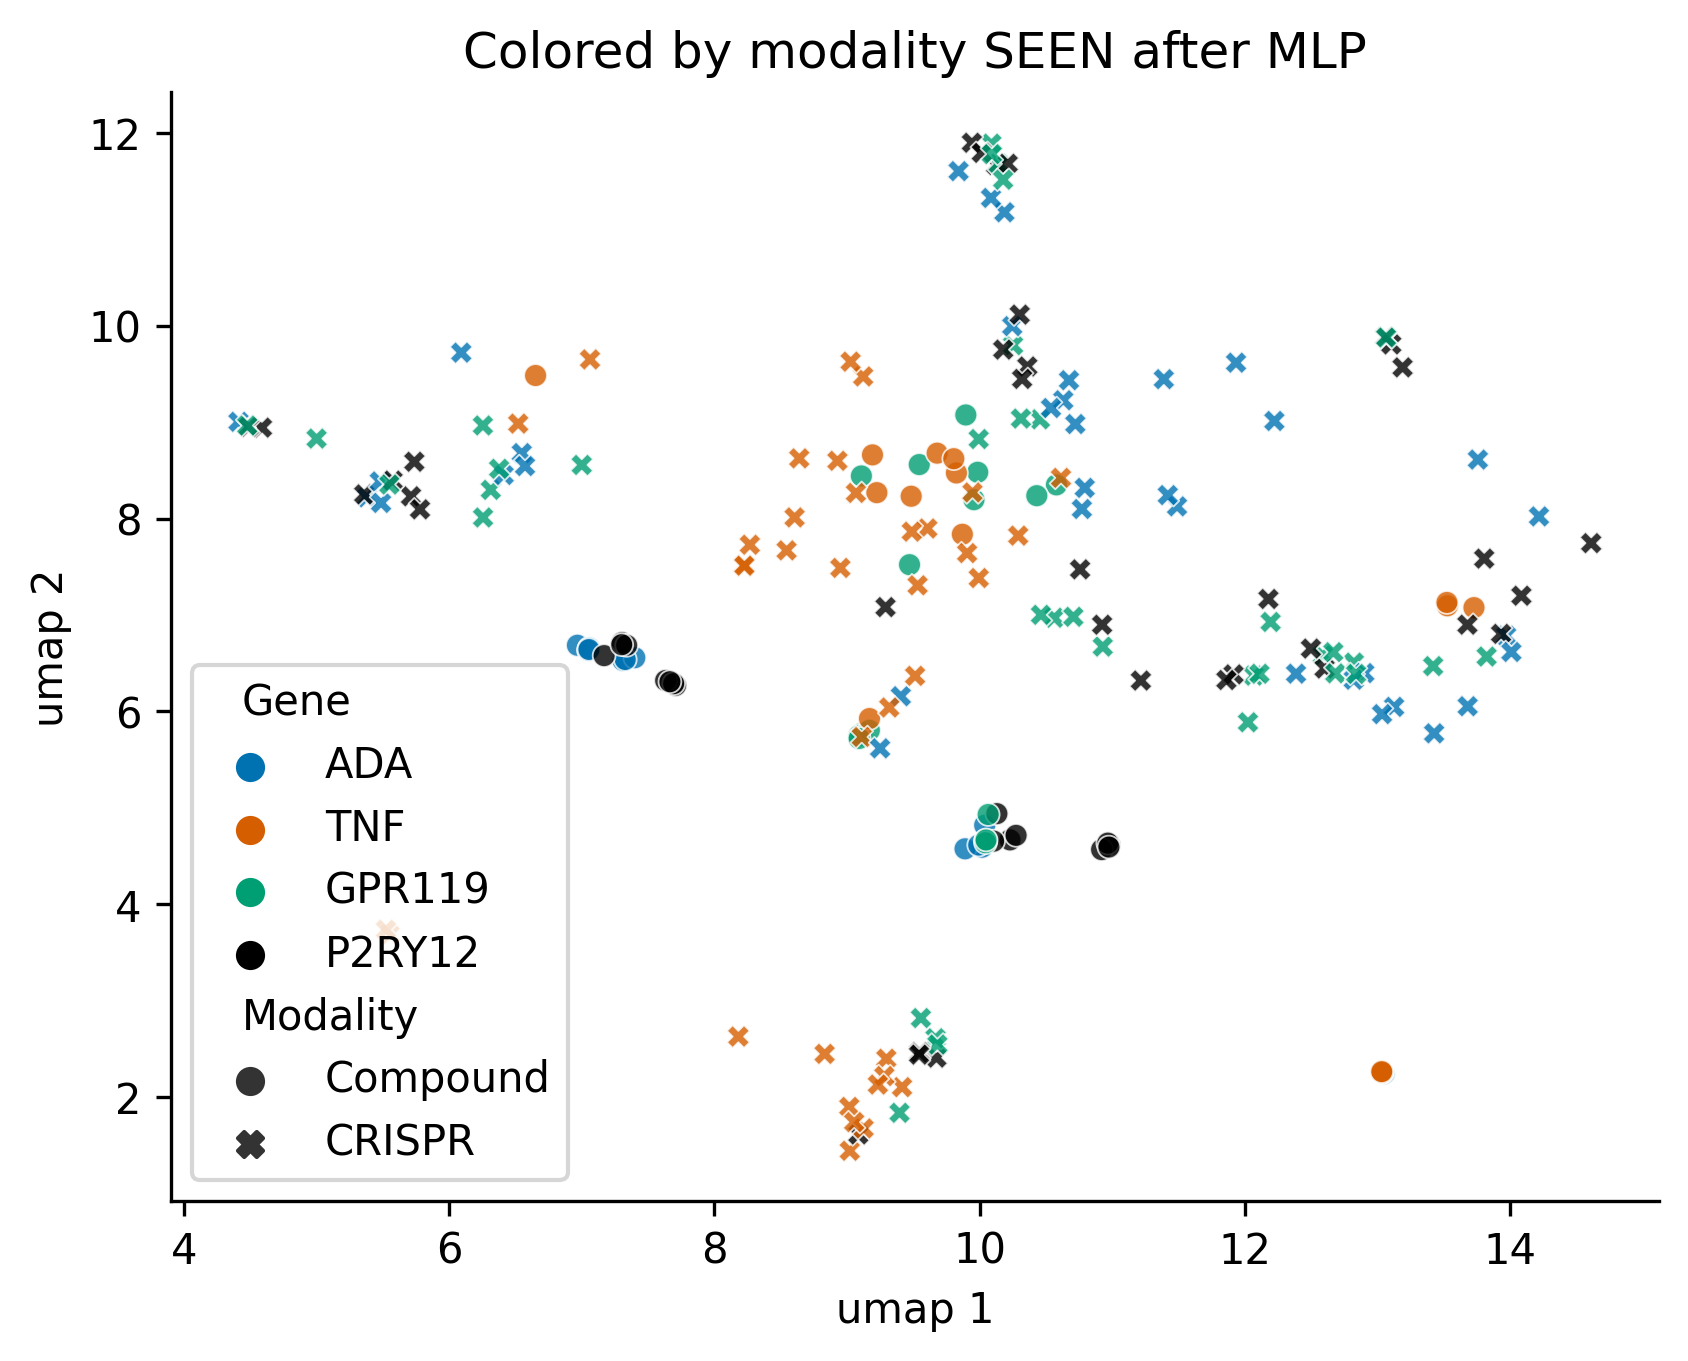

In [76]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ADA|TNF|GPR119|P2RY12')]
#X_embedded_df['Gene'].value_counts()
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ADA','TNF','GPR119','P2RY12'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN after MLP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

In [70]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ADA':'#0072b2',
             'TNF':'#d55e00',
             'GPR119':'#009e73',
             'P2RY12':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_seen_new.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df['Gene'].value_counts()

/tmp/ipykernel_3338895/1356760169.py:41: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_seen_new.csv')


Gene
ADA       52
TNF       52
GPR119    52
P2RY12    52
KCNN4     52
          ..
FOXM1     36
PTPN2     36
COMT      36
FFAR2     36
PDE3A     36
Name: count, Length: 130, dtype: int64

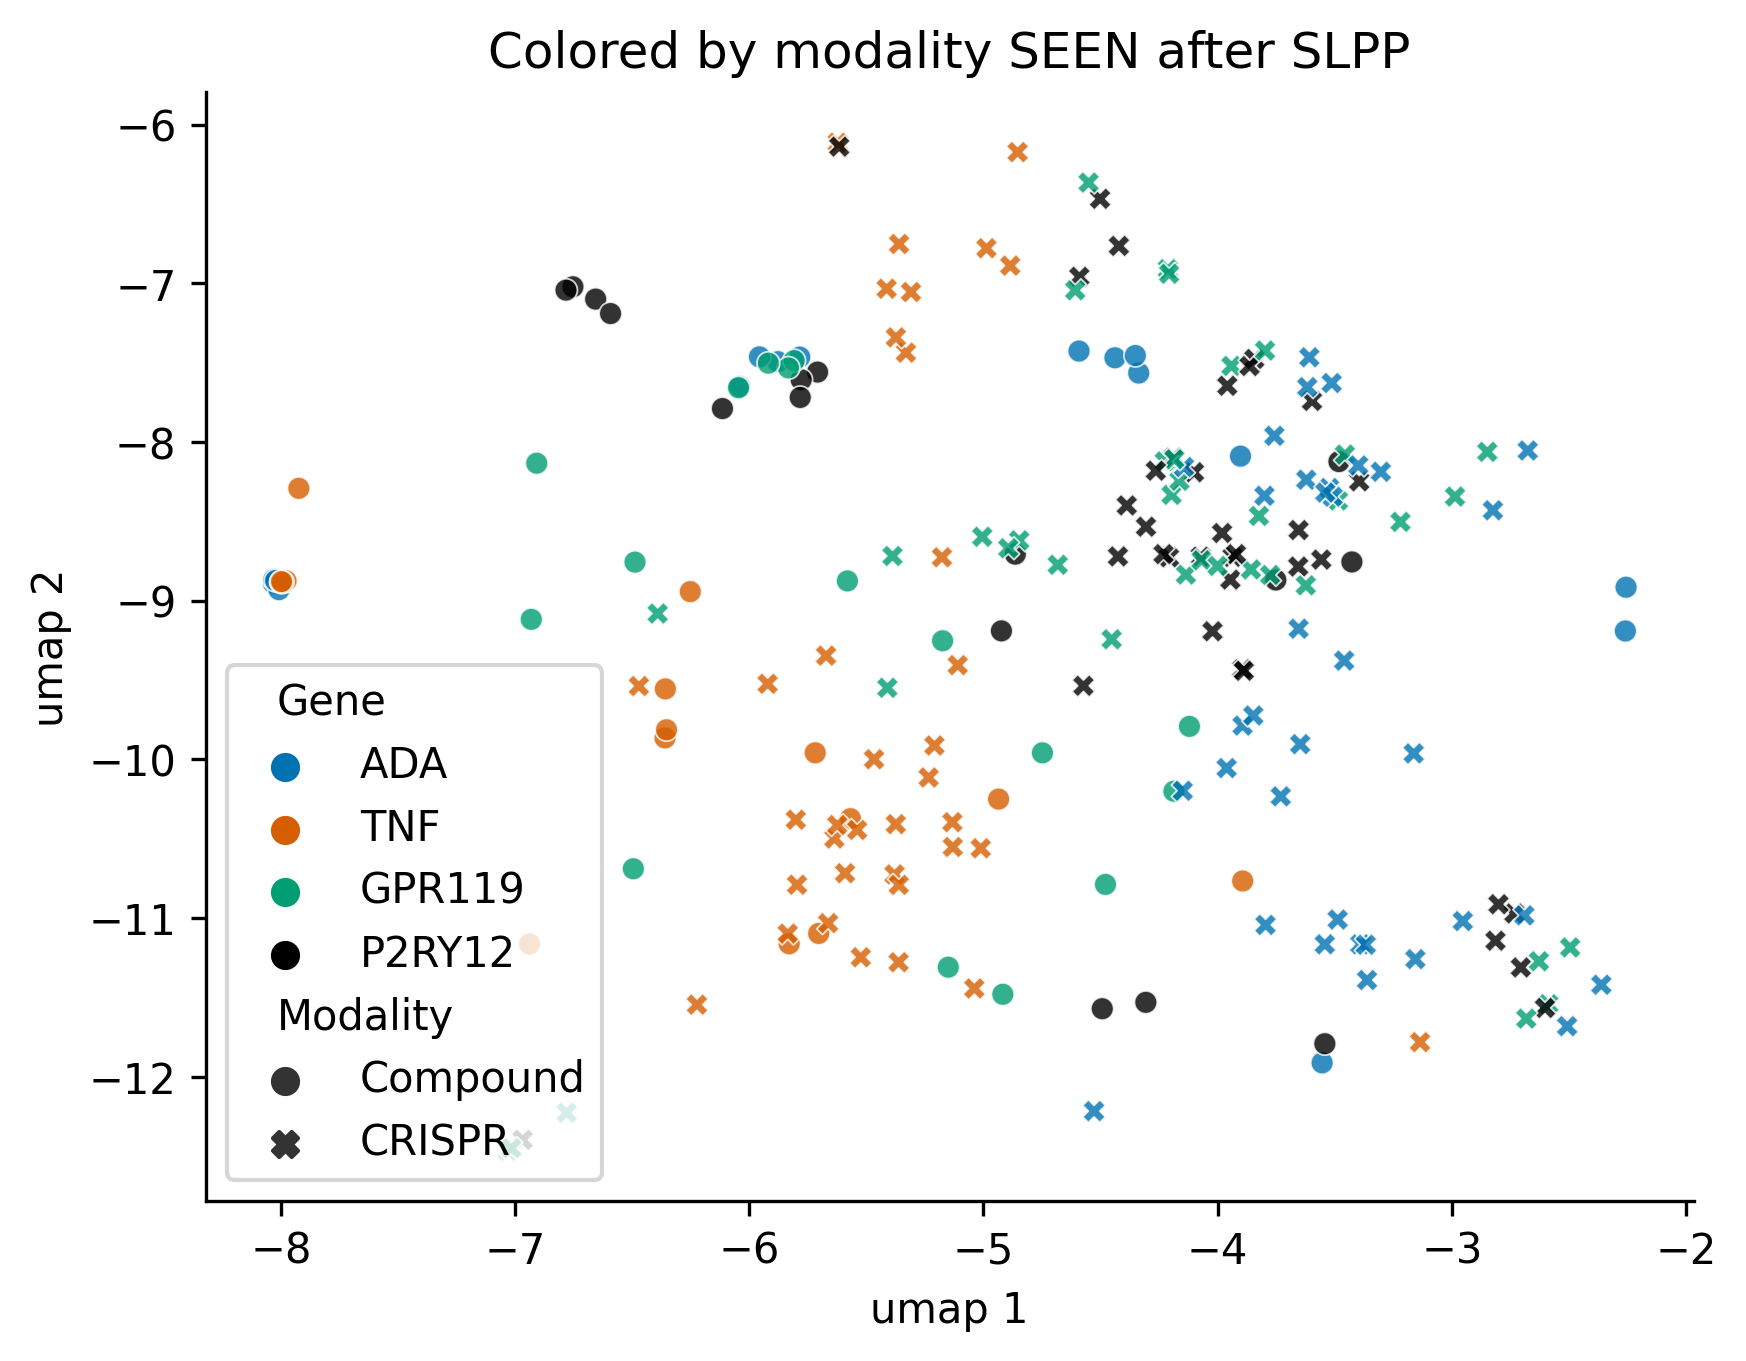

In [72]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ADA|TNF|GPR119|P2RY12')]
#X_embedded_df['Gene'].value_counts()
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ADA','TNF','GPR119','P2RY12'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN after SLPP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

In [74]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ADA':'#0072b2',
             'TNF':'#d55e00',
             'GPR119':'#009e73',
             'P2RY12':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_old.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
#X_embedded_df['Gene'].value_counts()
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ADA|TNF|GPR119|P2RY12')]
#X_embedded_df['Gene'].value_counts()
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ADA','TNF','GPR119','P2RY12'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN Cellprofiler")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/1469309302.py:41: DtypeWarning: Columns (2,3,7,8,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_old.csv')


Gene
ADA       52
TNF       52
GPR119    52
P2RY12    52
KCNN4     52
          ..
FOXM1     36
PTPN2     36
COMT      36
FFAR2     36
PDE3A     36
Name: count, Length: 130, dtype: int64

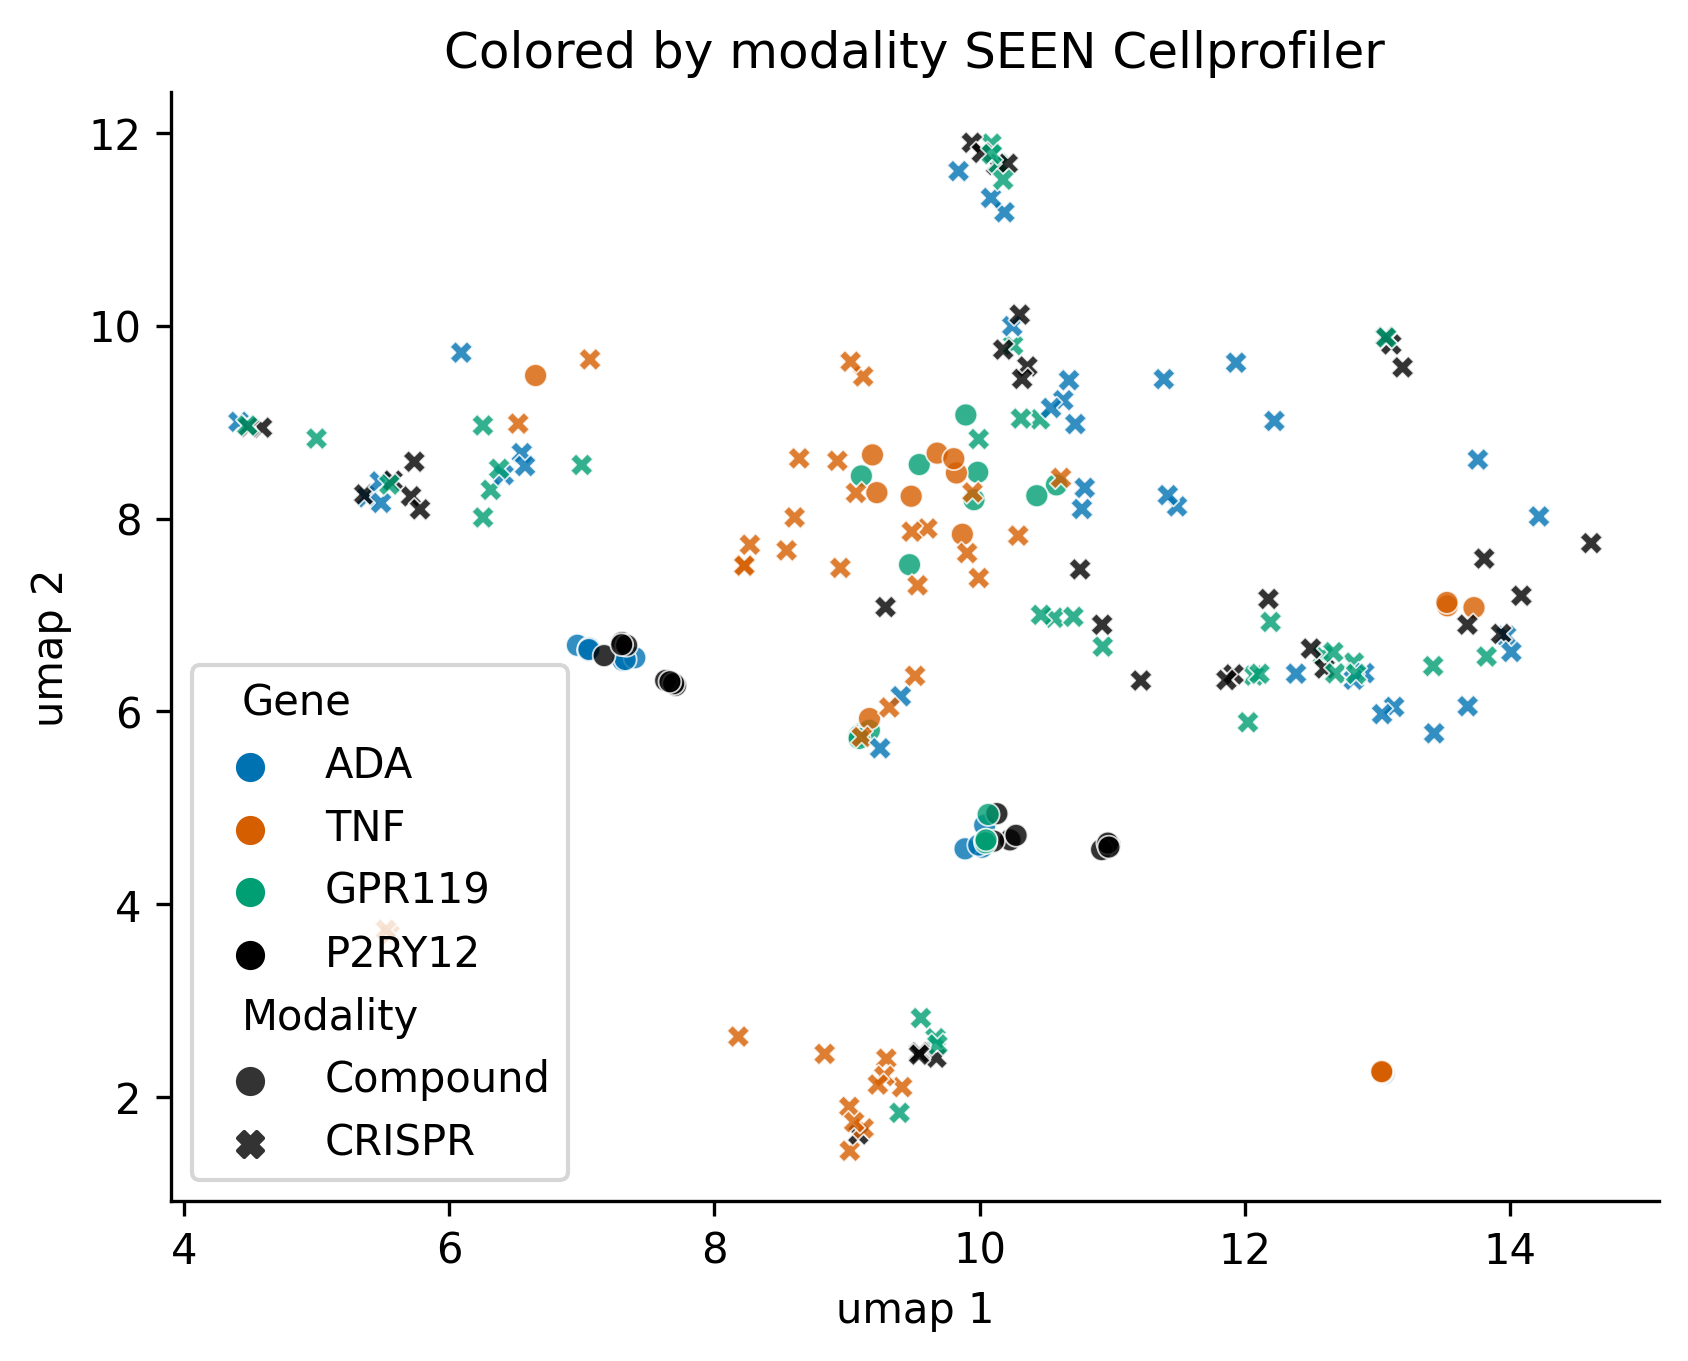

In [97]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ADA':'#0072b2',
             'TNF':'#d55e00',
             'GPR119':'#009e73',
             'P2RY12':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_SEEN.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df['Gene'].value_counts()

/tmp/ipykernel_3338895/2567539764.py:41: DtypeWarning: Columns (2,6,7,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_SEEN.csv')


Gene
ADA       52
TNF       52
GPR119    52
P2RY12    52
KCNN4     52
          ..
FOXM1     36
PTPN2     36
COMT      36
FFAR2     36
PDE3A     36
Name: count, Length: 130, dtype: int64

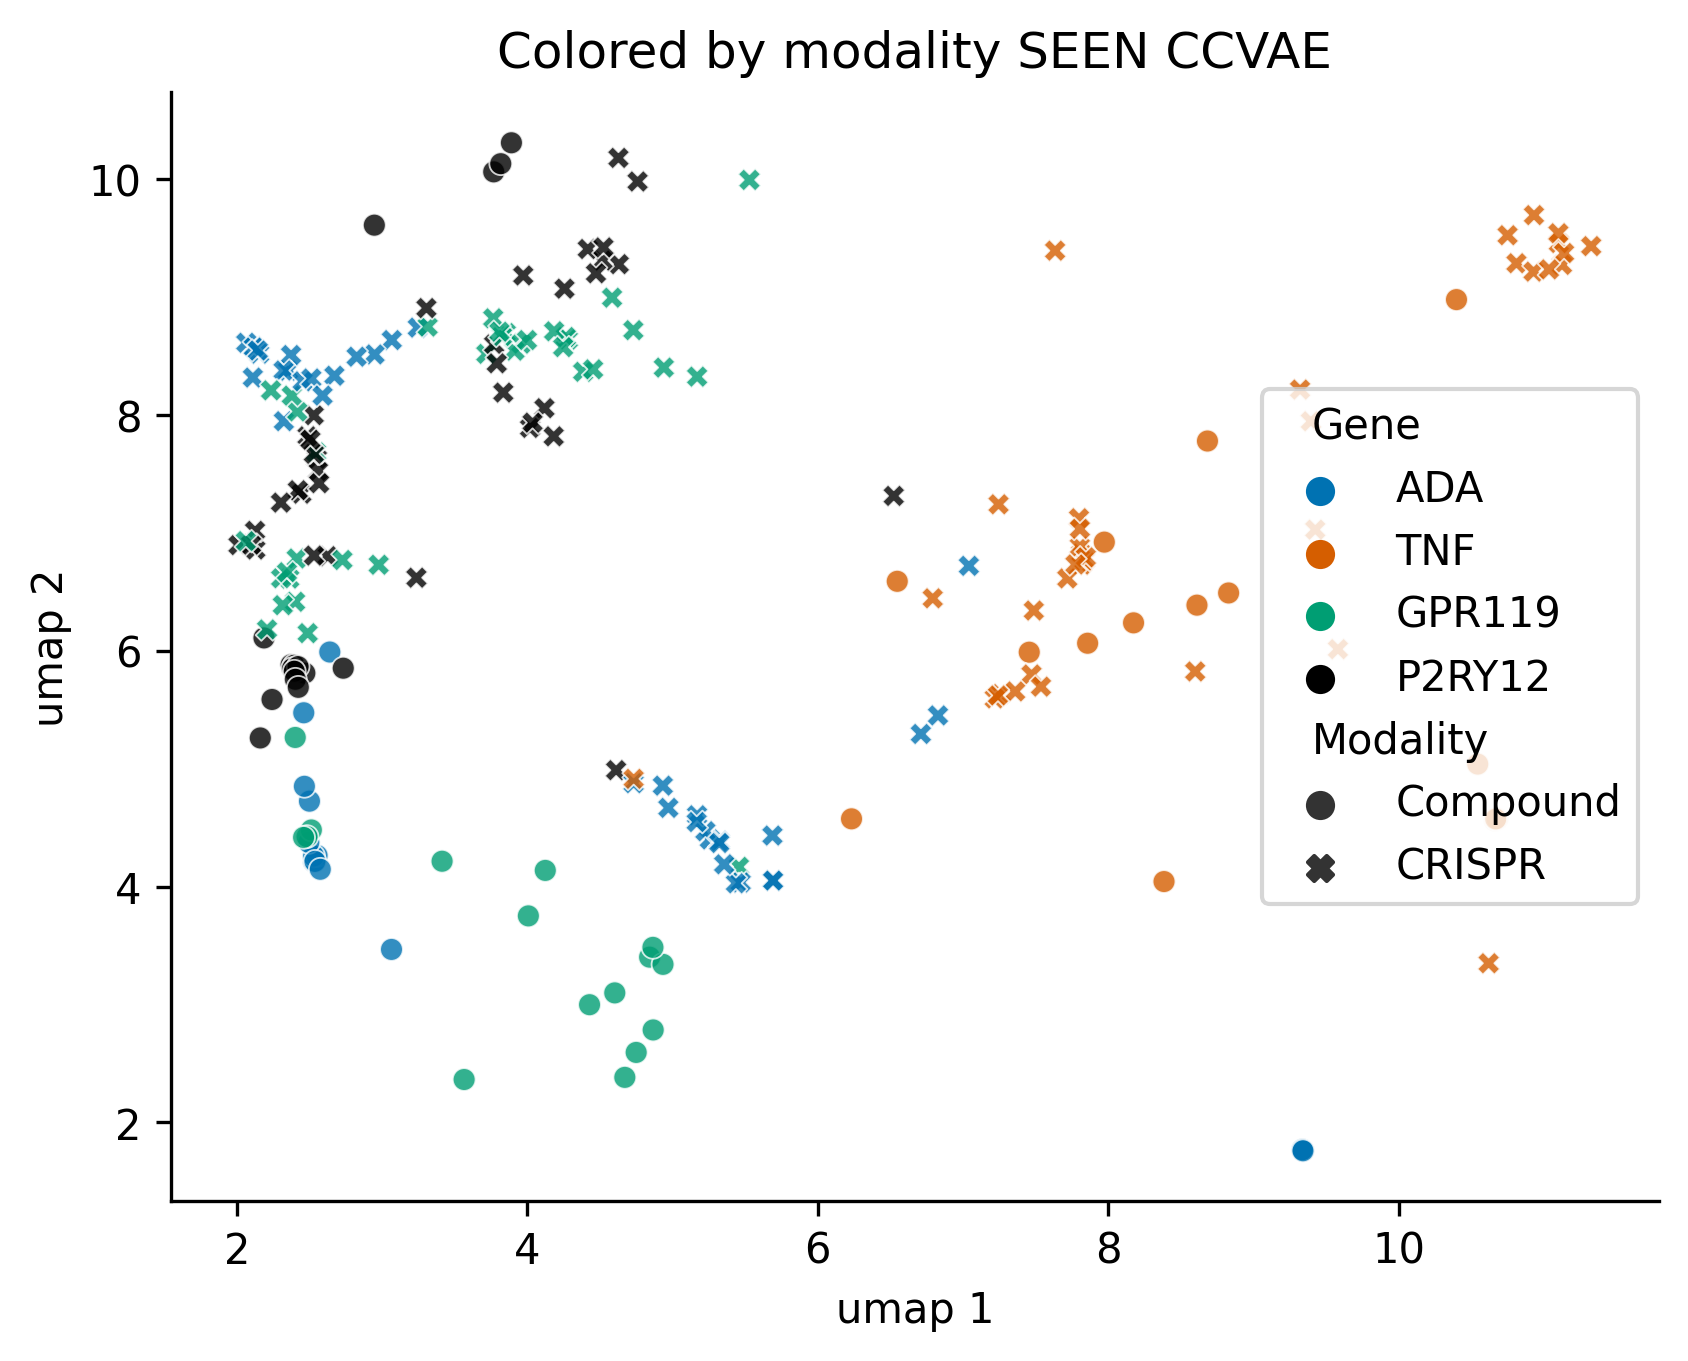

In [99]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ADA|TNF|GPR119|P2RY12')]
#X_embedded_df['Gene'].value_counts()
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ADA','TNF','GPR119','P2RY12'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN CCVAE")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

In [92]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'PDE3A':'#0072b2',
             'VEGFA':'#d55e00',
             'RPL3':'#009e73',
             'TUBB4B':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_new.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df['Gene'].value_counts()

/tmp/ipykernel_3338895/389389266.py:41: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_new.csv')


Gene
PDE3A     84
VEGFA     84
RPL3      84
TUBB4B    84
PRKCB     84
          ..
PNLIP     36
SSTR2     36
ABL1      36
P2RY12    36
SIRT2     35
Name: count, Length: 130, dtype: int64

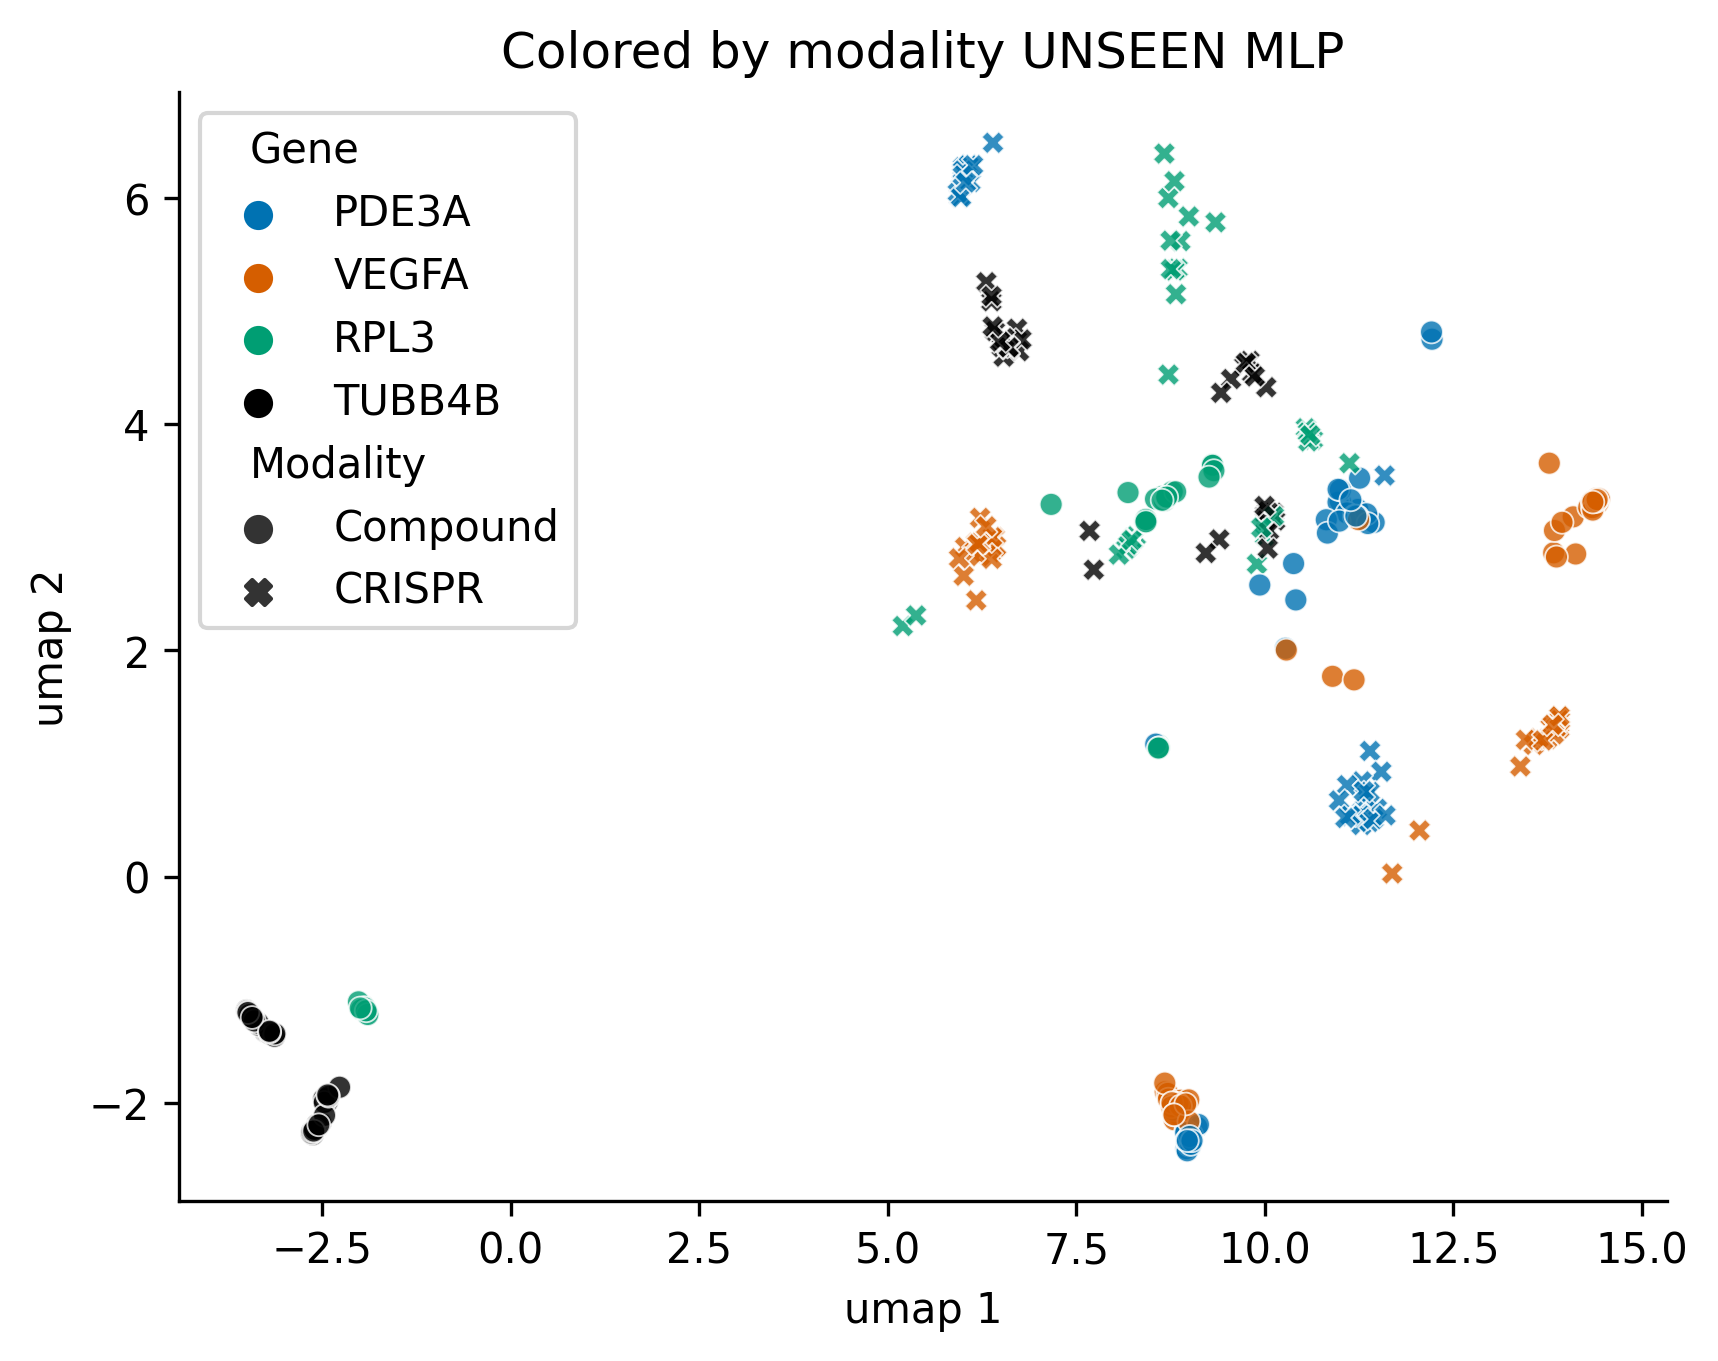

In [93]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('PDE3A|VEGFA|RPL3|TUBB4B')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['PDE3A','VEGFA','RPL3','TUBB4B'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality UNSEEN MLP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/2768125195.py:41: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_unseen_new.csv')


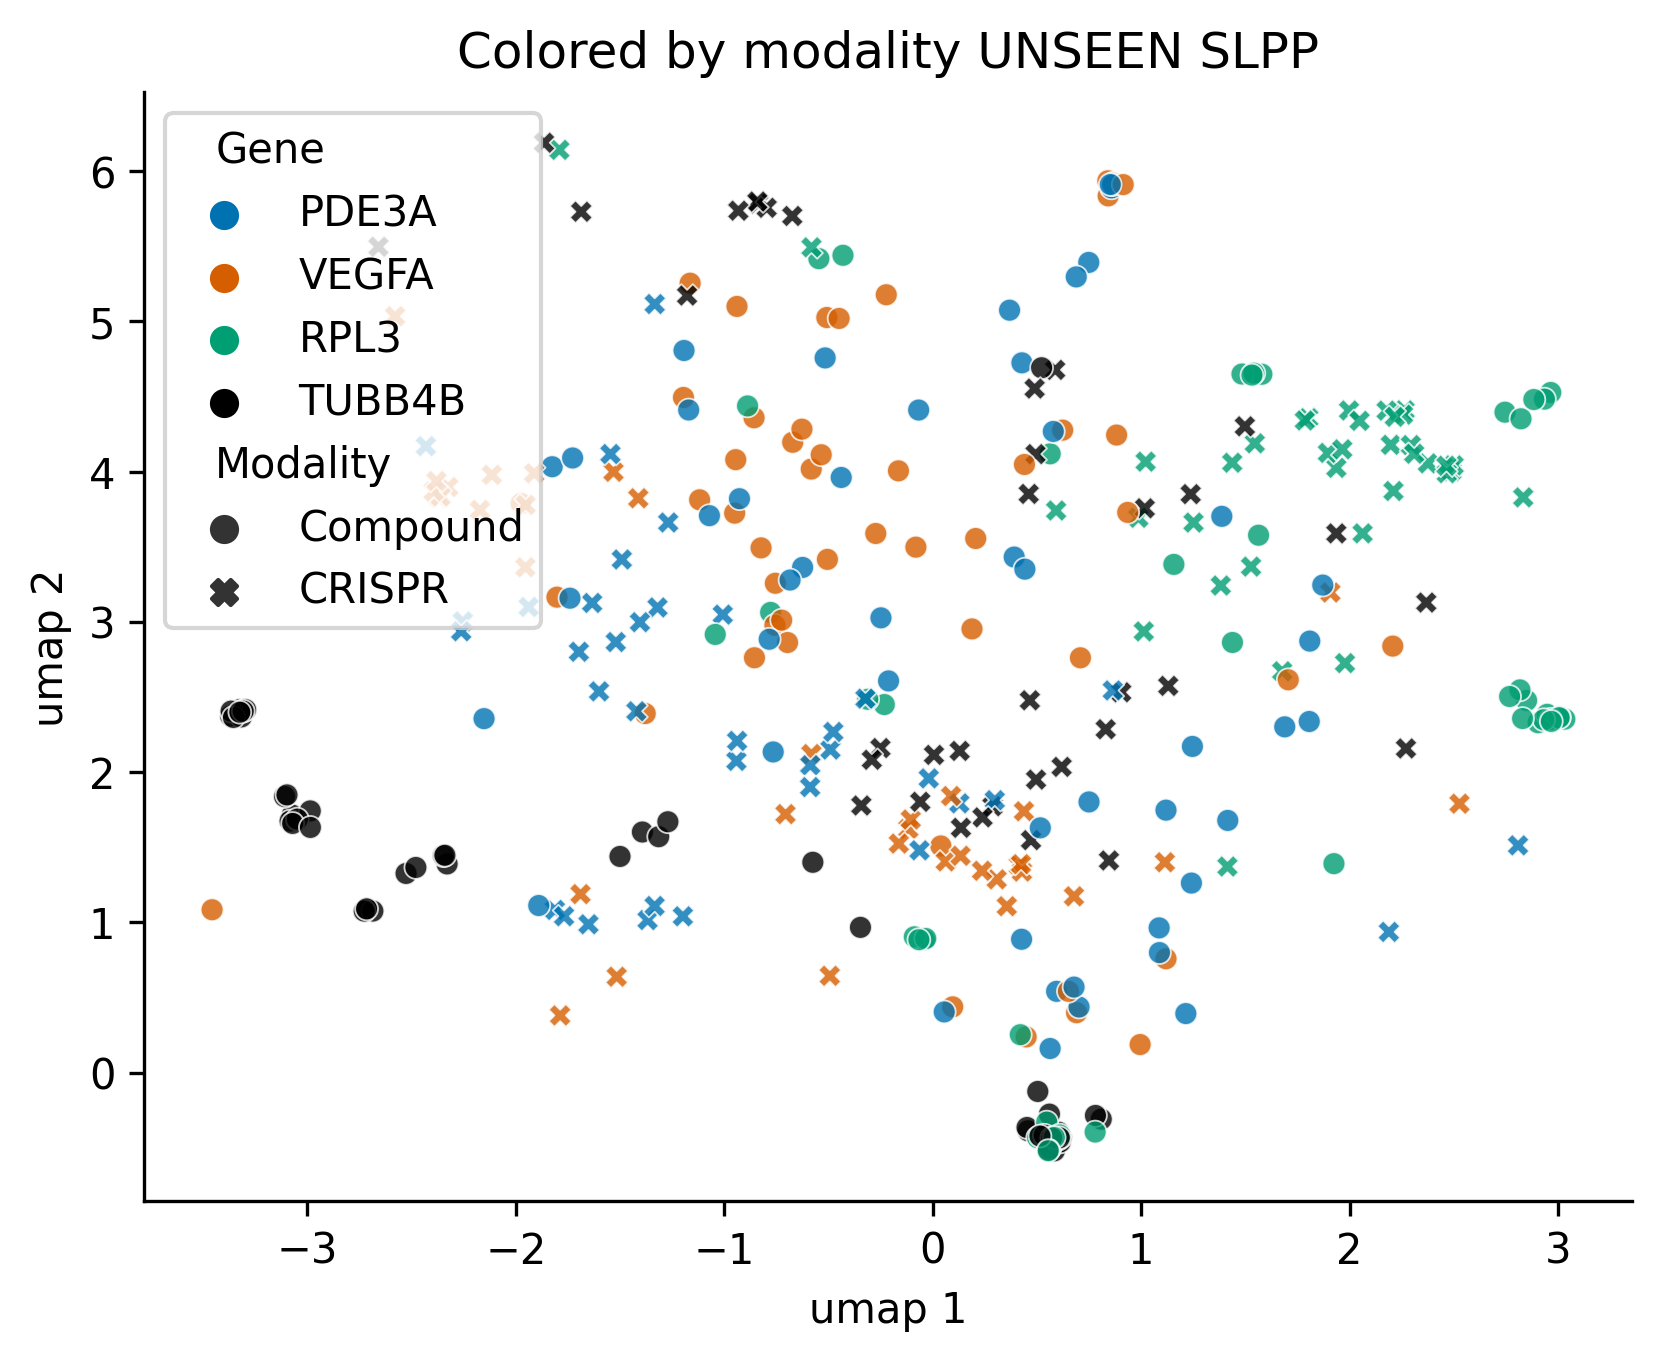

In [95]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'PDE3A':'#0072b2',
             'VEGFA':'#d55e00',
             'RPL3':'#009e73',
             'TUBB4B':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_unseen_new.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('PDE3A|VEGFA|RPL3|TUBB4B')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['PDE3A','VEGFA','RPL3','TUBB4B'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by modality UNSEEN SLPP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/424030978.py:41: DtypeWarning: Columns (2,3,7,8,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_old.csv')


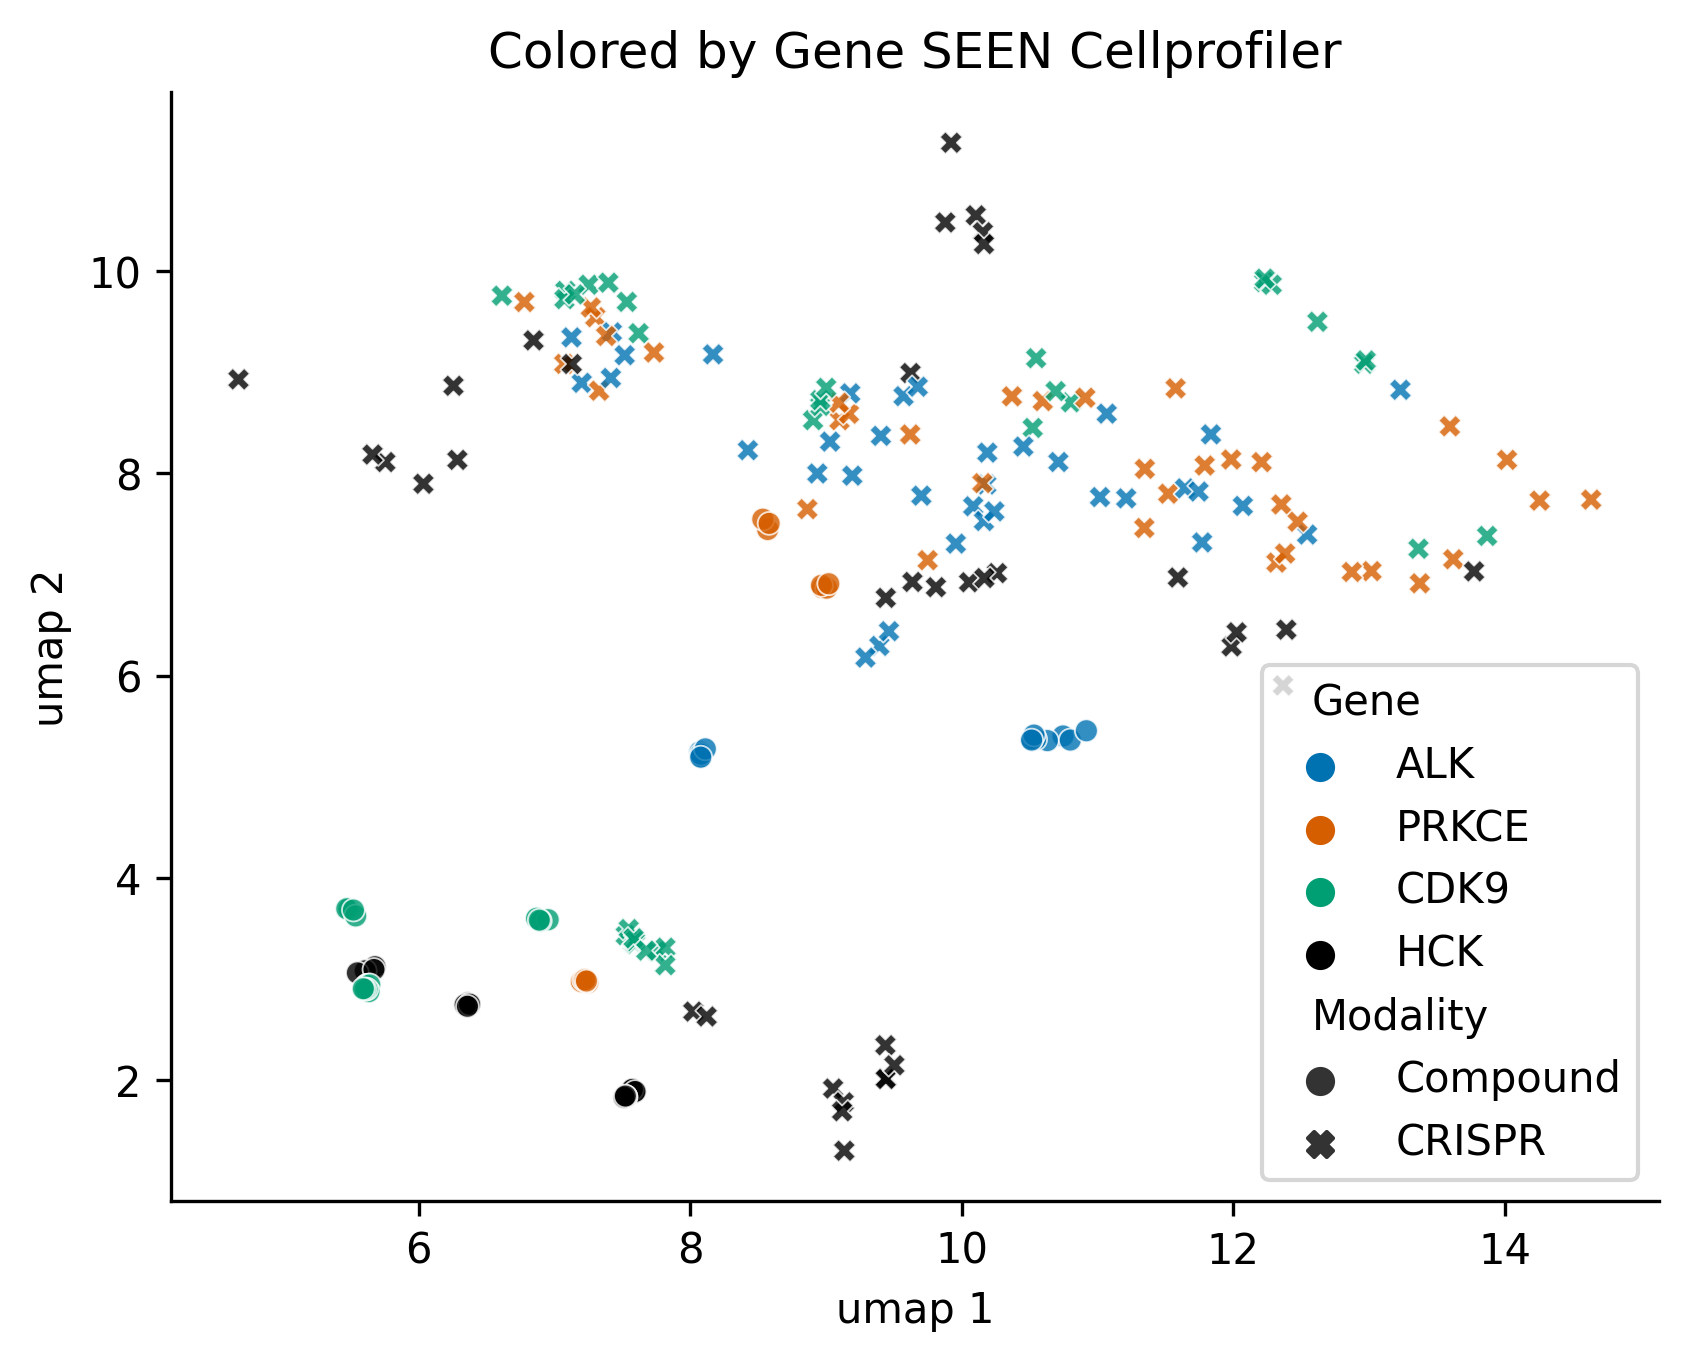

In [109]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ALK':'#0072b2',
             'PRKCE':'#d55e00',
             'CDK9':'#009e73',
             'HCK':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_old.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ALK|PRKCE|CDK9|HCK')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ALK','PRKCE','CDK9','HCK'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by Gene SEEN Cellprofiler")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/3449575932.py:41: DtypeWarning: Columns (2,6,7,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_SEEN.csv')


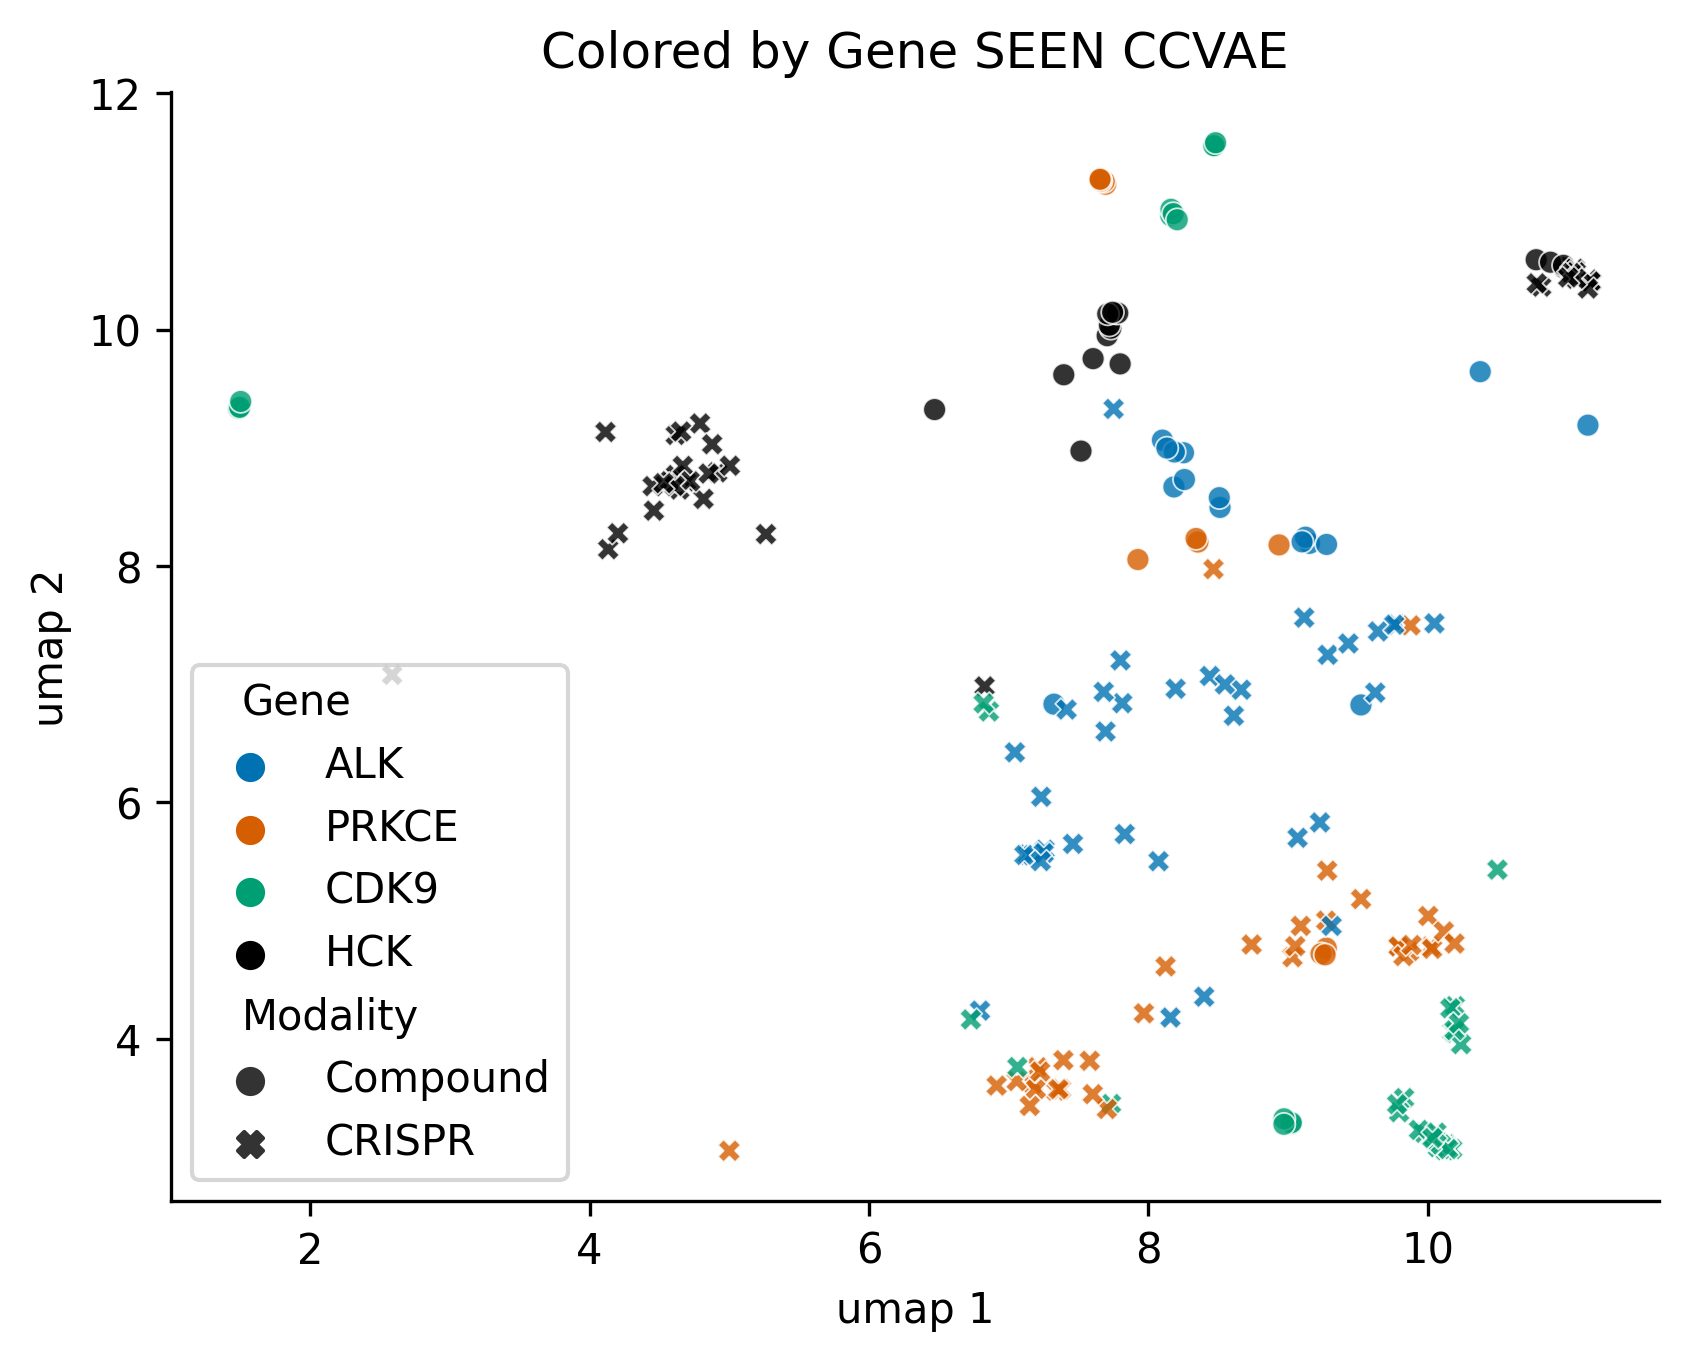

In [108]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'ALK':'#0072b2',
             'PRKCE':'#d55e00',
             'CDK9':'#009e73',
             'HCK':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_SEEN.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('ALK|PRKCE|CDK9|HCK')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['ALK','PRKCE','CDK9','HCK'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by Gene SEEN CCVAE")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/2658215226.py:41: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_old.csv')


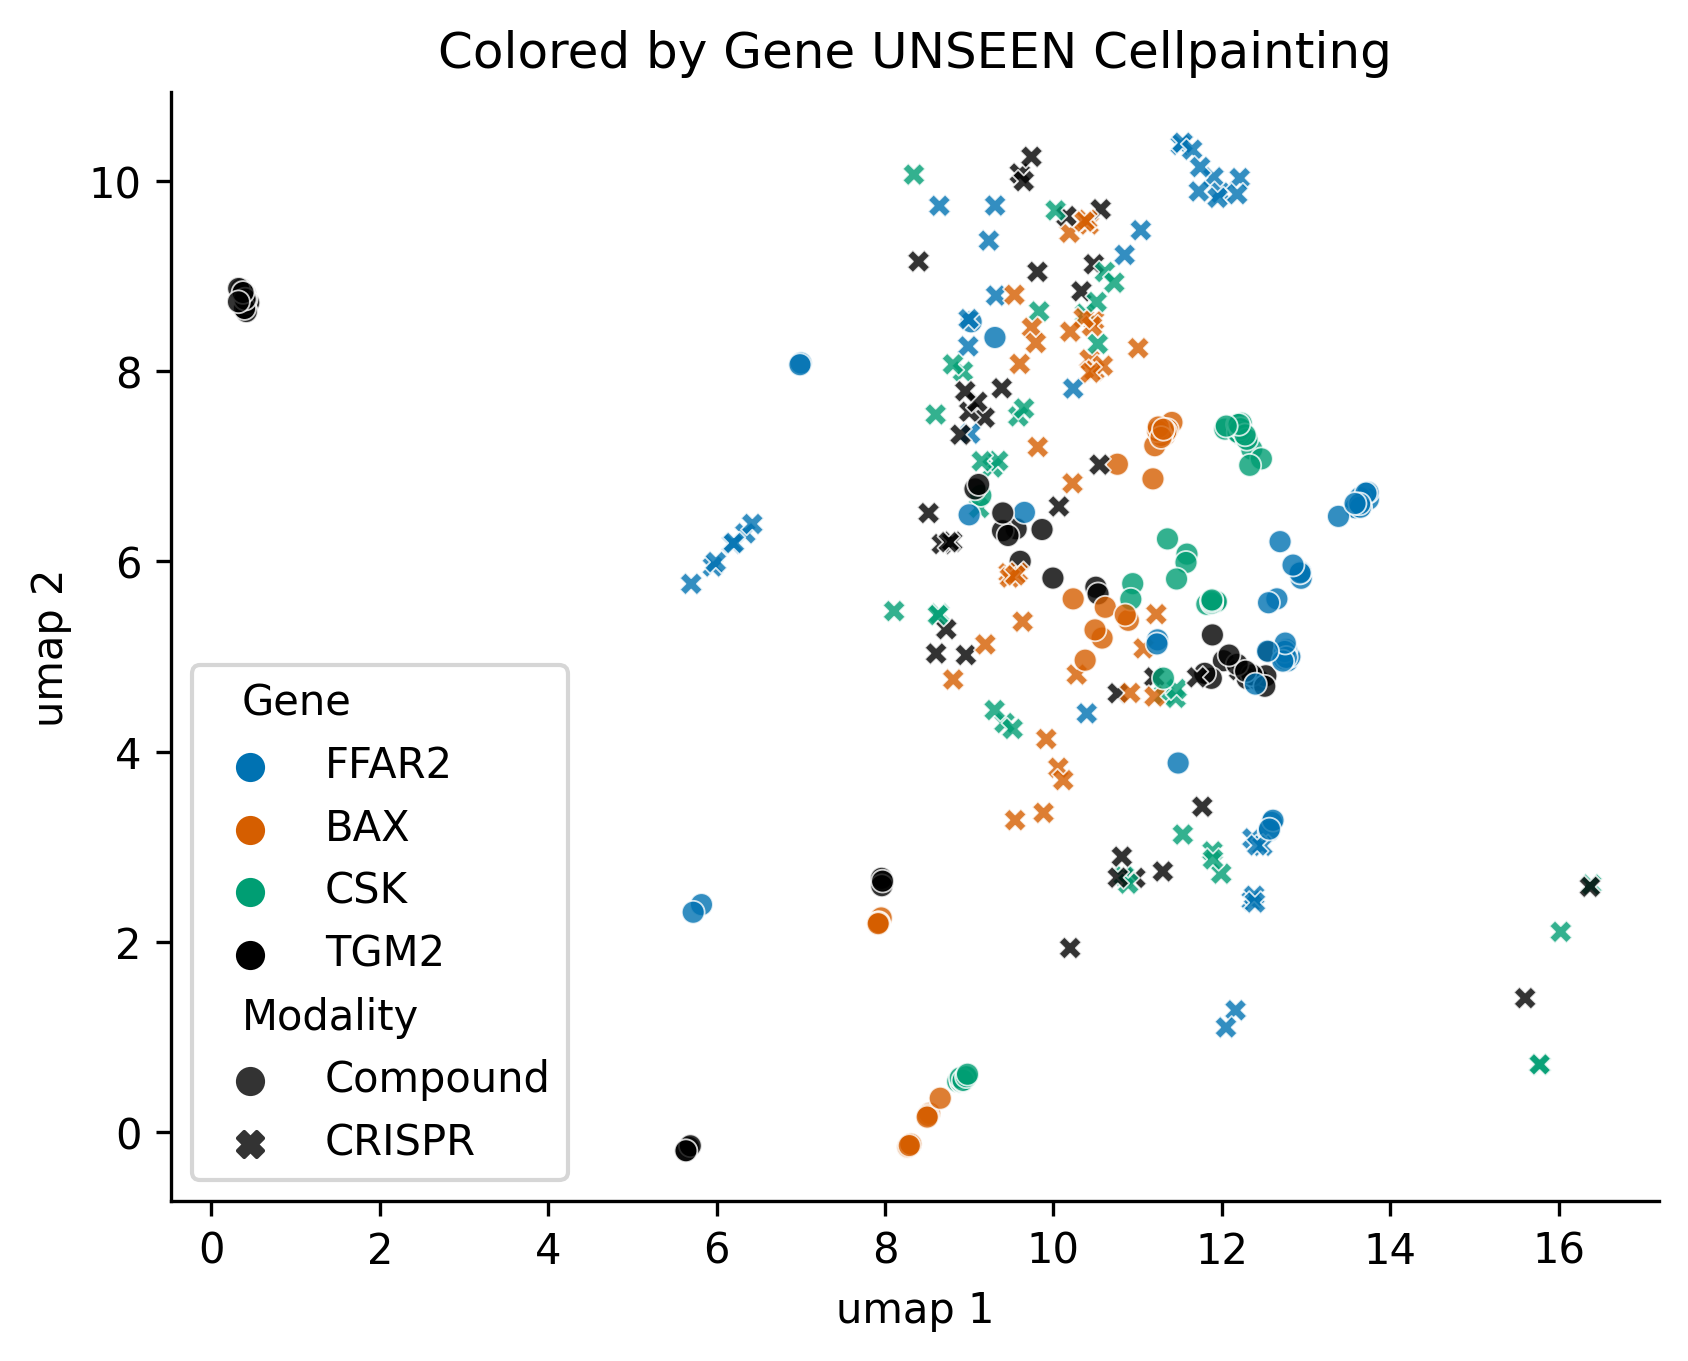

In [111]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'FFAR2':'#0072b2',
             'BAX':'#d55e00',
             'CSK':'#009e73',
             'TGM2':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_old.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('FFAR2|BAX|CSK|TGM2')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['FFAR2','BAX','CSK','TGM2'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by Gene UNSEEN Cellpainting")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_3338895/191858337.py:41: DtypeWarning: Columns (2,6,7,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_UNSEEN.csv')


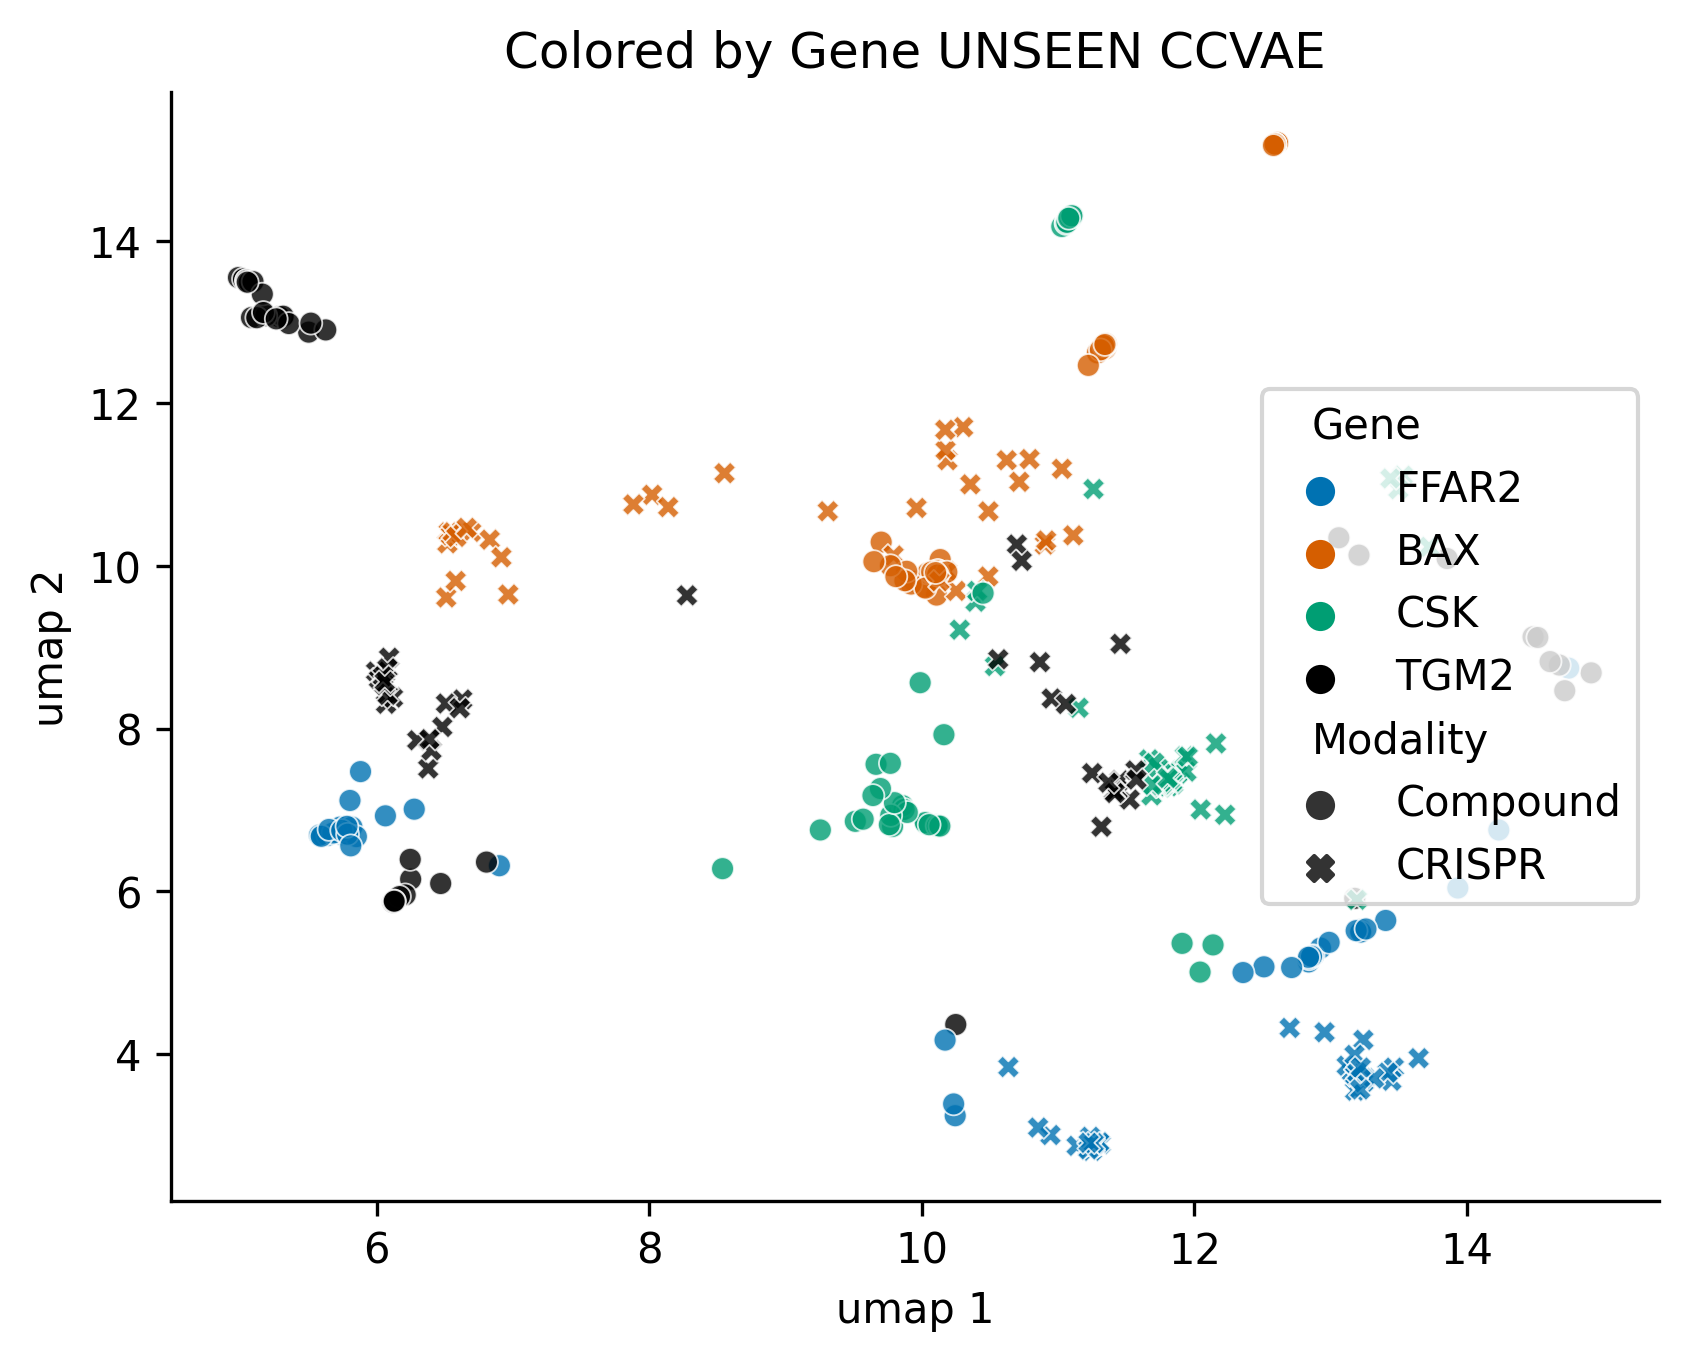

In [110]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'FFAR2':'#0072b2',
             'BAX':'#d55e00',
             'CSK':'#009e73',
             'TGM2':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/CCVAE_UNSEEN.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('FFAR2|BAX|CSK|TGM2')]
#X_embedded_df['Gene'].value_counts()PDE3A VEGFA RPL3 TUBB4B
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['FFAR2','BAX','CSK','TGM2'],
    alpha=0.8,
    s=30,
    style='Modality'
)
#plt.figure(figsize=(100,80))
plt.title("Colored by Gene UNSEEN CCVAE")
sns.despine()
plt.savefig("figures/4.A549_modality.png")